## Informasi Mahasiswa

Nama: Ivan Chiari

NPM : 2108107010027

## Jenis Dataset

Dataset dari kaggle https://www.kaggle.com/datasets/pushprajnamdev/diabetes-dataset


informasi variabel
In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skin fold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* DiabetesPedigreeFunction: Diabetes pedigree function
* Age: Age (years)
* Outcome: Class variable (0 or 1)

## studi kasus klasifikasi
membangun model prediksi diagnosa diabetes untuk pasien perempuan dengan beberapa kondisi seperti jumlah kehamilan, tingkat glukosa, BMI, dan Umur pasien.

## Import Libary dan Baca dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
diabetes = pd.read_csv('dataset/diabetes.csv')
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Preprocessing Data

In [3]:
# Cek info dataset
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    bool   
dtypes: bool(1), float64(2), int64(6)
memory usage: 48.9 KB


In [4]:
# Cek statistik deskriptif dataset
diabetes.describe()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
# cek missing value
print(diabetes.isnull().sum())

pregnancies                 0
glucose                     0
bloodpressure               0
skinthickness               0
insulin                     0
bmi                         0
diabetespedigreefunction    0
age                         0
outcome                     0
dtype: int64


In [6]:
# cek duplicate value
print(diabetes.duplicated().sum())

0


In [7]:
from sklearn.preprocessing import LabelEncoder

# Encode the outcome column such that 1 means diabetes and 0 means no diabetes
label_encoder = LabelEncoder()
diabetes['outcome'] = label_encoder.fit_transform(diabetes['outcome'])

In [8]:
# Display the first five rows of the dataset
diabetes.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
# Cek distribusi kelas pada dataset
print(diabetes['outcome'].value_counts())

outcome
0    500
1    268
Name: count, dtype: int64


<Axes: >

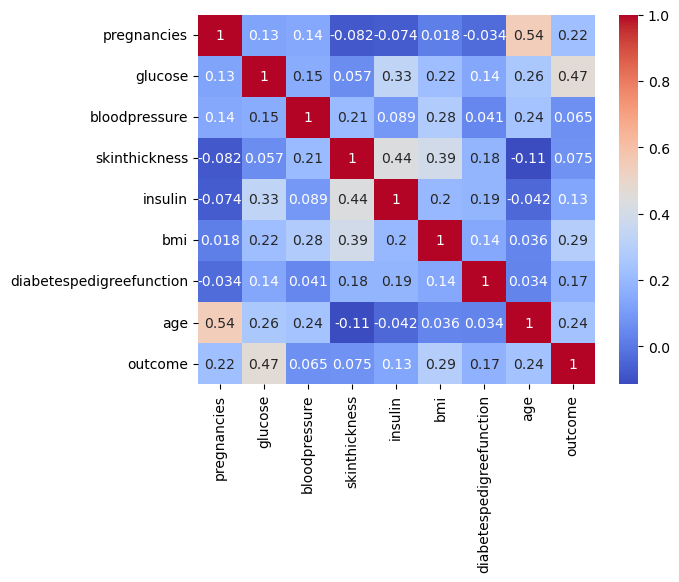

In [10]:
# Visualisasi korrelasi antar variabel
df_cor =diabetes.corr()
sns.heatmap(df_cor, annot=True, cmap='coolwarm')

* Setiap fitur berkorelasi positif dengan fitur outcome kecuali ketebalan kulit, tekanan darah mempunyai korelasi sangat kecil hingga tidak penting.

* fitur Glukosa sangat berkorelasi positif, yang menyatakan fakta bahwa diabetes terjadi karena tingginya kadar gula darah dalam aliran darah yang tidak mampu diserap oleh sel secara efektif.

In [11]:
diabetes.columns

Index(['pregnancies', 'glucose', 'bloodpressure', 'skinthickness', 'insulin',
       'bmi', 'diabetespedigreefunction', 'age', 'outcome'],
      dtype='object')

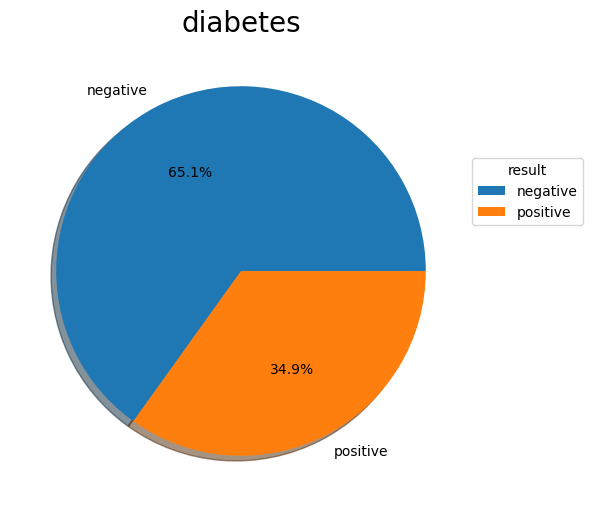

In [12]:
# Visualisasi distribusi variabel outcome
plt.figure(figsize=(8,6))

# Membuat pie chart
r=diabetes['outcome'].value_counts().values
label = ['negative','positive']
plt.pie(r,labels=label,shadow=True,autopct='%2.1f%%',explode=[0,0])
plt.legend(title='result',loc=(1,0.6))
plt.title('diabetes',fontsize=20)
plt.show()

* Di antara total populasi hampir 66,1 % telah didiagnosis negatif mengidap diabetes dan 34,9 % telah didiagnosis positif mengidap diabetes.
* Seperti yang terlihat di atas, kami menandai bahwa ini adalah kumpulan data yang seimbang tetapi tidak baik dan sedikit bias terhadap pasien non diabetes.

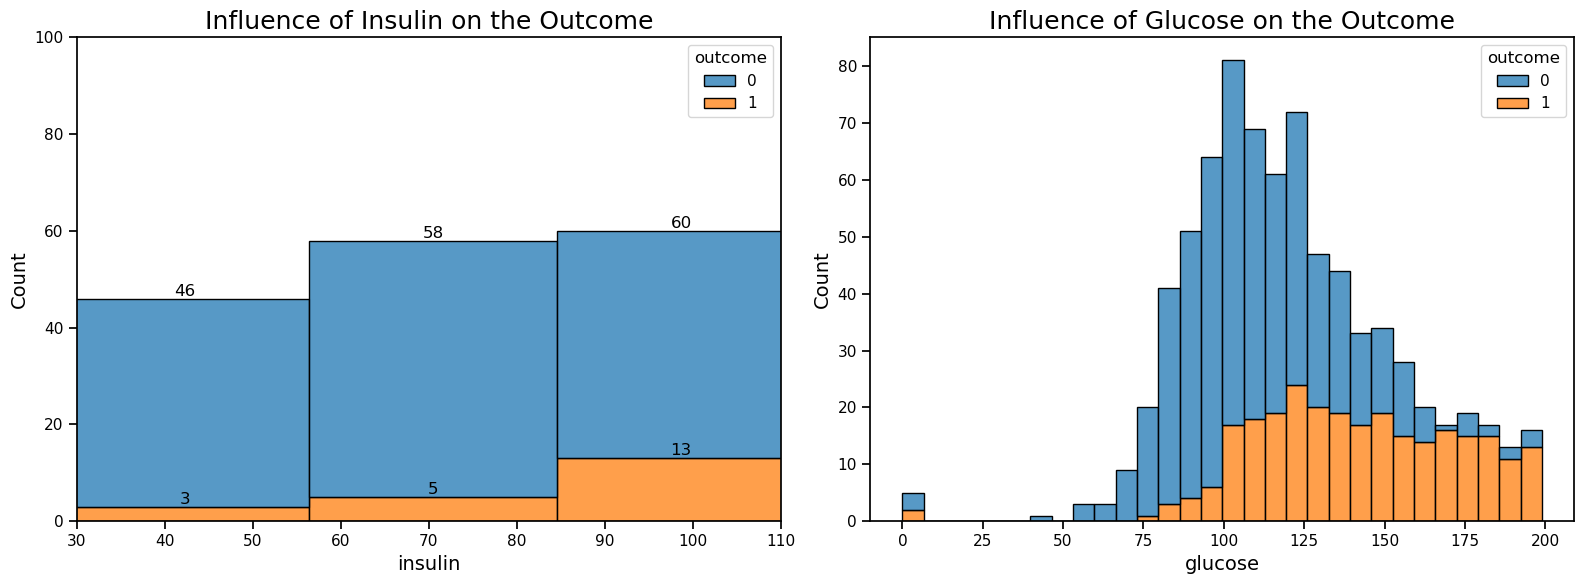

In [13]:
# Visualisasi distribusi variabel glucose dan insulin
sns.set_context('notebook')
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Membuat histogram plot untuk variabel insulin
sns.histplot(x='insulin', data=diabetes, hue='outcome', ax=ax[0], bins=30, multiple="stack")
ax[0].set_title('Influence of Insulin on the Outcome', fontsize=18)
ax[0].set_xlabel('insulin', fontsize=14)
ax[0].set_ylabel('Count', fontsize=14)
ax[0].set_xlim([30, 110]) 
ax[0].set_ylim([0, 100])  
for i in ax[0].containers:
    ax[0].bar_label(i,)

# Membuat histogram plot untuk variabel glucose 
sns.histplot(x='glucose', data=diabetes, hue='outcome', bins=30, ax=ax[1], multiple="stack")
ax[1].set_title('Influence of Glucose on the Outcome', fontsize=18)
ax[1].set_xlabel('glucose', fontsize=14)
ax[1].set_ylabel('Count', fontsize=14)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Relationship between Pregnancies on the outcome')

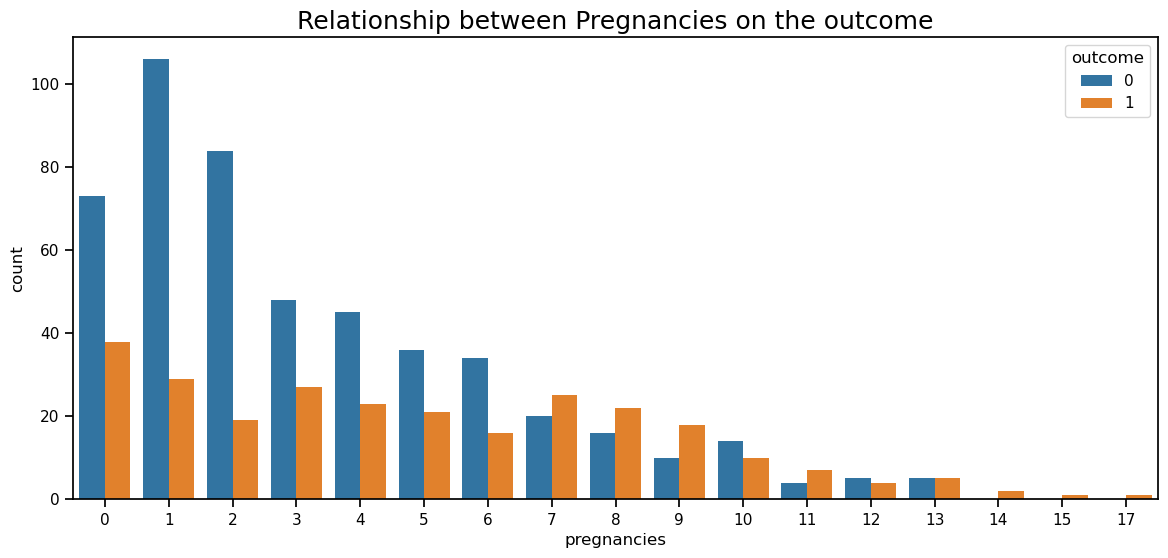

In [14]:
# Visualisasi hubungan antara variabel Pregnancies dan Outcome
plt.figure(figsize=(14,6))
sns.countplot(x='pregnancies',hue='outcome',data=diabetes)
plt.title('Relationship between Pregnancies on the outcome',fontsize=18,  loc ='center' )

Dilihat dari plot, terlihat jelas bahwa seorang pasien dengan jumlah kegagalan kehamilan yang lebih tinggi telah didiagnosis positif mengidap diabetes.
Fakta: pasien diabetes mempunyai kemungkinan tinggi untuk mengalami keguguran.

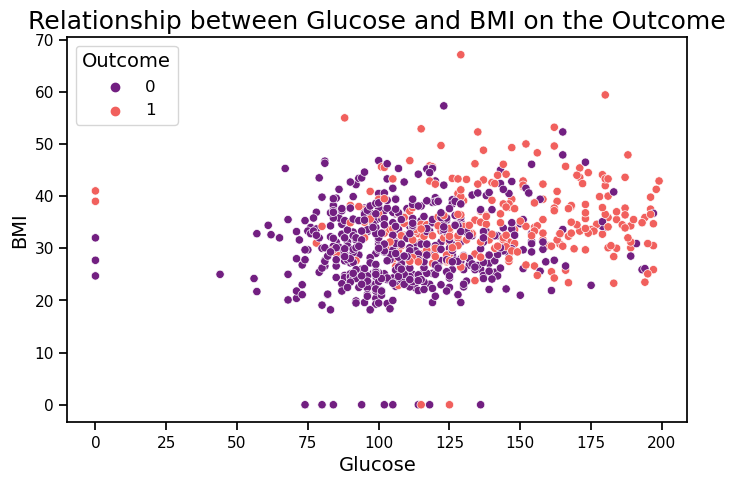

In [15]:
# plot glucose and bmi scatter with outcome hue
plt.figure(figsize=(8, 5))
sns.scatterplot(x='glucose', y='bmi', data=diabetes, hue='outcome', palette='magma')
plt.title('Relationship between Glucose and BMI on the Outcome', fontsize=18, loc='center')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')
plt.show()

## Split dataset dan normalisasi data

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Initialize the StandardScaler
scaler = StandardScaler()

# Select features and target variable
X = diabetes[['glucose', 'bmi', 'age', 'pregnancies',]]
y = diabetes['outcome']

# Scale the features
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


## Membangun Model 

In [17]:
# Import the support vector classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Create a support vector classifier
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

# Make predictions
y_pred = svc.predict(X_test)
print("Classification report for - \n{}:\n{}\n".format(svc, classification_report(y_test, y_pred)))

Classification report for - 
SVC(kernel='linear'):
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154




hasil prediksi model SVC dengan kernel linear untuk semua atribut yang dipilih mempunyai skor akurasi 75%

In [18]:
# model linear SVM dengan variabel glucose dan bmi
svm_bmi = SVC( kernel='linear',random_state=10)
svm_bmi.fit(X_train[:, [0, 1]], y_train)

SVC(kernel='linear', random_state=10)

In [19]:
# model testing glucose bmi
y_pred_bmi =svm_bmi.predict(X_test[:, [0, 1]])
print("Classification Report:")
print(classification_report(y_test, y_pred_bmi))


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



hasil prediksi model dengan glucose dan bmi sebagai variabel input berhasil 77%

In [20]:
# membangun model SVM dengan kernel rbf dan variabel glucose dan bmi
svm_rbf = SVC(kernel='rbf', C=10, gamma=1)
svm_rbf.fit(X_train[:, [0, 1]], y_train)


SVC(C=10, gamma=1)

In [21]:
# Model testing and prediction
y_pred_rbf = svm_rbf.predict(X_test[:, [0, 1]])  
print("Classification Report:")
print(classification_report(y_test, y_pred_rbf))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.86      0.82        99
           1       0.70      0.58      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.75       154



hasil prediksi dengan model svm kernel rbf adalah 76%

In [22]:
# model training glucose age
svm_glucose_age = SVC( kernel='linear',random_state=10)
svm_glucose_age.fit(X_train[:, [0, 2]], y_train)

SVC(kernel='linear', random_state=10)

In [23]:
# model testing glucose age
y_pred_age =svm_glucose_age.predict(X_test[:, [0, 2]])
print("Classification Report:")
print(classification_report(y_test, y_pred_age))

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.87      0.82        99
           1       0.70      0.56      0.63        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



model klasifikasi yang dilatih dengan data glucose dan age memperoleh akurasi 76%

## Visualisasi Model 

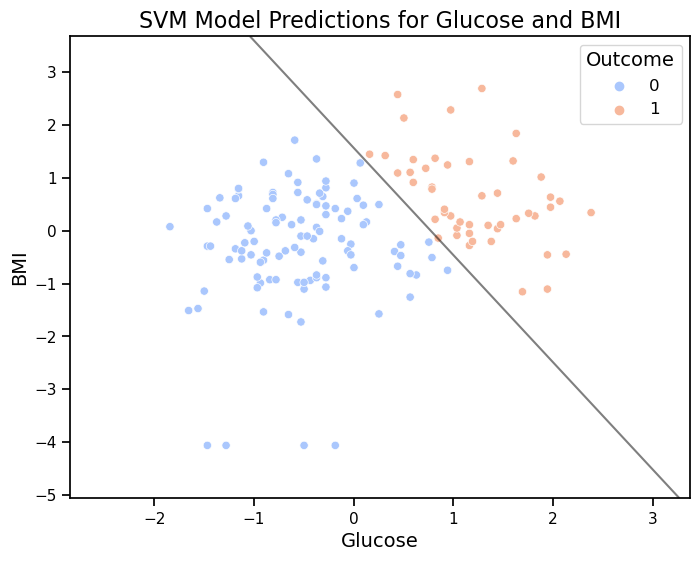

In [24]:
# Plot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_bmi, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('SVM Model Predictions for Glucose and BMI', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_bmi.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


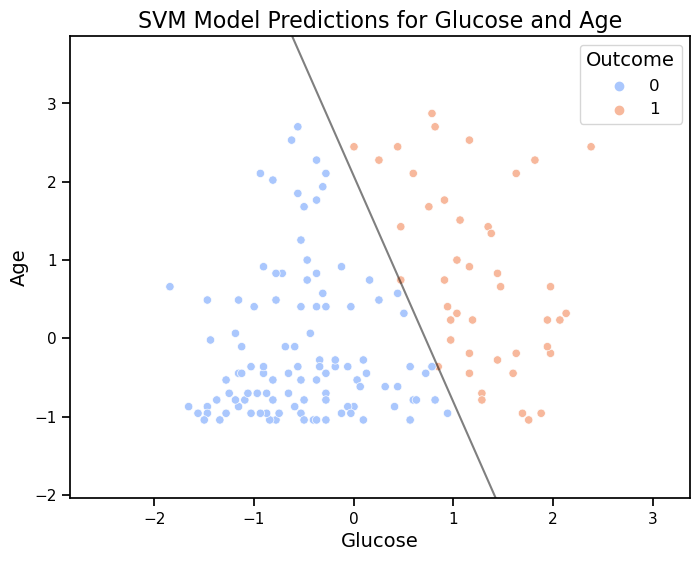

In [25]:
# Plot for Glucose vs BMI
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 2], hue=y_pred_age, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('Age', fontsize=14)
plt.title('SVM Model Predictions for Glucose and Age', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the decision boundary
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 2].min() - 1, X_test[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = svm_glucose_age.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='black', levels=[0], alpha=0.5)

plt.show()


#### plot terbaik dengan model rbf

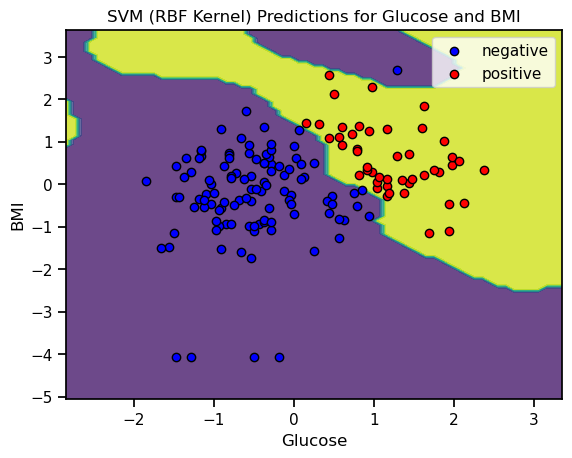

In [26]:
# Define the meshgrid range
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the scatter plot with specified labels
plt.scatter(X_test[y_pred_rbf == 0, 0], X_test[y_pred_rbf == 0, 1], c='blue', label='negative', edgecolors='k')
plt.scatter(X_test[y_pred_rbf == 1, 0], X_test[y_pred_rbf == 1, 1], c='red', label='positive', edgecolors='k')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('SVM (RBF Kernel) Predictions for Glucose and BMI')

# Add legend
plt.legend()

plt.show()


plot for glucose vs bmi with decision boundary dengan rbf SVM model berhasil memisahkan kelas dengan diagnosa diabetes dan tidak diabetes

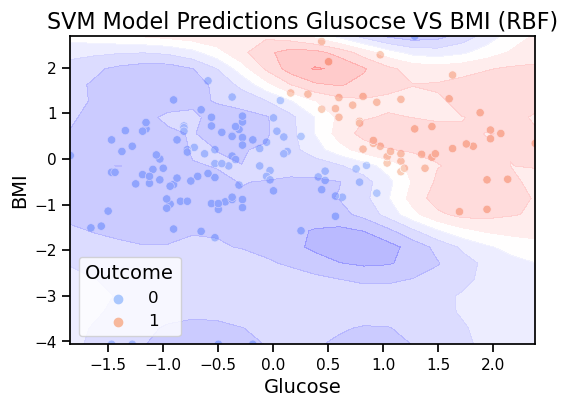

In [27]:
# Plotting the decision boundary
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_test[:, 0], y=X_test[:, 1], hue=y_pred_rbf, palette='coolwarm')
plt.xlabel('Glucose', fontsize=14)
plt.ylabel('BMI', fontsize=14)
plt.title('SVM Model Predictions Glusocse VS BMI (RBF)', fontsize=16)
plt.legend(title='Outcome', fontsize=12, title_fontsize='14')

# Add the hyperplane
x_points = np.linspace(X_test[:, 0].min(), X_test[:, 0].max(), 20)
y_points = np.linspace(X_test[:, 1].min(), X_test[:, 1].max(), 20)
X1, X2 = np.meshgrid(x_points, y_points)
Z = svm_rbf.decision_function(np.array([X1.ravel(), X2.ravel()]).T)
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, cmap='bwr', alpha=0.3) 
plt.show()


## mencoba hyperparameter tuning
mencoba membuat parameter tuning untuk model svm

In [28]:
# hyperparameter
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters
param_grid = {'C': [0.1, 0.5, 1, 5, 10], 
              'gamma': [1, 0.5, 0.1, 0.05, 0.01],
              'kernel': ['rbf', 'linear'],
              }

model1 = SVC()
# Create a GridSearchCV object
grid = GridSearchCV(model1, param_grid,cv=5, refit=True, verbose=3)

# Fit the GridSearchCV object to the data
grid.fit(X_train, y_train)

# best hyperparameters
grid.best_params_

# best model
best_poly_svr = grid.best_estimator_

# Predict using the best model
y_pred = best_poly_svr.predict(X_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.642 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.650 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.675 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.664 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.740 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.805 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.756 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.748 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.803 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.5, kernel=rbf;, score=0.748 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.5, kernel=rbf

In [29]:
print(grid.best_params_)
# Classification report
print(classification_report(y_test, y_pred))

{'C': 0.5, 'gamma': 0.05, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.79      0.87      0.83        99
           1       0.71      0.58      0.64        55

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154



Model yang didapat dengan hyperparameter tuning adalah model kernel RBF dengan parameter C: 0.5, gamma: 0.05 memperoleh akurasi 77%

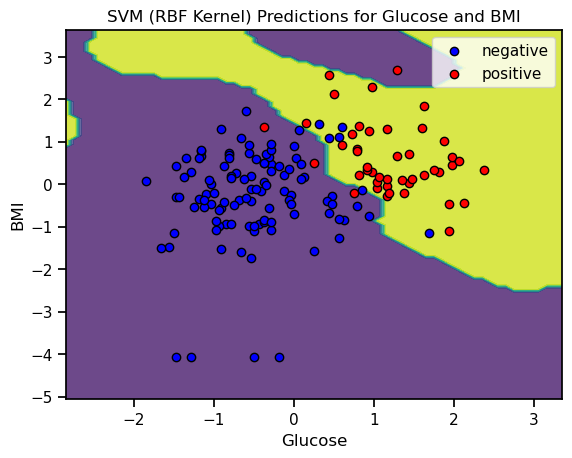

In [30]:
# Define the meshgrid range
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Get predictions for each point in the meshgrid
Z = svm_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the contour plot
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot the scatter plot with specified labels
plt.scatter(X_test[y_pred == 0, 0], X_test[y_pred == 0, 1], c='blue', label='negative', edgecolors='k')
plt.scatter(X_test[y_pred == 1, 0], X_test[y_pred == 1, 1], c='red', label='positive', edgecolors='k')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('SVM (RBF Kernel) Predictions for Glucose and BMI')

# Add legend
plt.legend()

plt.show()
